In [1]:
import pandas as pd 
import os 
import requests
import json 
import matplotlib.pyplot as plt

In [2]:
nyc_arrests=pd.read_csv('data/NYC_Arrests.csv')
nyc_arrests

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638
1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241
2,173113513,12/31/2017,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1.0,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572
3,173113423,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074
4,173113421,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811
5,173130583,12/31/2017,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601001,F,K,73,0.0,18-24,M,BLACK,1007524.0,188555.0,40.684194,-73.916085
6,173129349,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,9,0.0,18-24,F,WHITE HISPANIC,990592.0,202391.0,40.722199,-73.977122
7,173128438,12/31/2017,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,M,25,0.0,25-44,M,BLACK,999724.0,230625.0,40.799683,-73.944112
8,173128437,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,2.0,25-44,M,BLACK HISPANIC,998165.0,226184.0,40.787496,-73.949752
9,173128433,12/31/2017,705.0,"FORGERY,ETC.-MISD.",358.0,OFFENSES INVOLVING FRAUD,PL 1702000,M,M,17,0.0,18-24,M,WHITE,991195.0,212559.0,40.750107,-73.974936


In [46]:
nyc_arrests['OFNS_DESC'].value_counts()

DANGEROUS DRUGS                                1056389
BURGLARY                                        830187
FELONY ASSAULT                                  641439
OTHER STATE LAWS                                240418
CRIMINAL TRESPASS                               196181
VEHICLE AND TRAFFIC LAWS                        186049
DANGEROUS WEAPONS                               182926
OTHER TRAFFIC INFRACTION                        171304
MISCELLANEOUS PENAL LAW                         164469
OFFENSES AGAINST PUBLIC ADMINISTRATION          156544
CRIMINAL MISCHIEF & RELATED OFFENSES            146039
ROBBERY                                         144080
INTOXICATED & IMPAIRED DRIVING                   94685
OTHER STATE LAWS (NON PENAL LAW)                 79152
FORGERY                                          77850
SEX CRIMES                                       76670
OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV      66242
DISORDERLY CONDUCT                               30156
OFFENSES I

In [47]:
queens_arrests=nyc_arrests.loc[nyc_arrests['ARREST_BORO']=='Q']
queens_arrests

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638
1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,BURGLARY,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241
13,173124321,12/31/2017,500.0,"CONTROLLED SUBSTANCE,POSSESS. 1",117.0,DANGEROUS DRUGS,PL 2202101,F,Q,105,0.0,18-24,F,WHITE,1050931.0,202071.0,40.721072,-73.759443
17,173117305,12/31/2017,639.0,AGGRAVATED HARASSMENT 2,361.0,OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV,PL 2402500,M,Q,104,0.0,18-24,M,BLACK,1013787.0,195967.0,40.704520,-73.893470
18,173116160,12/31/2017,904.0,"INTOXICATED DRIVING,ALCOHOL",119.0,INTOXICATED/IMPAIRED DRIVING,VTL11920E2,F,Q,115,0.0,25-44,M,WHITE HISPANIC,1019944.0,214785.0,40.756148,-73.871164
20,173116157,12/31/2017,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,104,0.0,45-64,M,WHITE,1013701.0,195936.0,40.704435,-73.893781
22,173116159,12/31/2017,905.0,"INTOXICATED DRIVING,ALCOHOL",347.0,INTOXICATED & IMPAIRED DRIVING,VTL11920U2,M,Q,100,0.0,45-64,F,BLACK,1038797.0,153050.0,40.586603,-73.803614
25,173127729,12/31/2017,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,Q,106,0.0,25-44,F,WHITE HISPANIC,1038101.0,181874.0,40.665723,-73.805890
30,173120429,12/31/2017,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,Q,106,0.0,45-64,M,BLACK,1033414.0,188276.0,40.683323,-73.822738
31,173120428,12/31/2017,339.0,"LARCENY,PETIT FROM OPEN AREAS,UNCLASSIFIED",341.0,BURGLARY,PL 1552500,M,Q,103,0.0,45-64,M,BLACK,1045673.0,199466.0,40.713960,-73.778436


In [48]:
queens_date=pd.concat([queens_arrests.drop('ARREST_DATE', axis = 1), 
          (queens_arrests.ARREST_DATE.str.split("/|T").str[:3].apply(pd.Series)
          .rename(columns={0:'month', 1:'day', 2:'year'}))], axis = 1)
queens_date

,ARREST_KEY,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,month,day,year
0,173130602,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638,12,31,2017
1,173114463,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,BURGLARY,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241,12,31,2017
13,173124321,500.0,"CONTROLLED SUBSTANCE,POSSESS. 1",117.0,DANGEROUS DRUGS,PL 2202101,F,Q,105,0.0,18-24,F,WHITE,1050931.0,202071.0,40.721072,-73.759443,12,31,2017
17,173117305,639.0,AGGRAVATED HARASSMENT 2,361.0,OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV,PL 2402500,M,Q,104,0.0,18-24,M,BLACK,1013787.0,195967.0,40.704520,-73.893470,12,31,2017
18,173116160,904.0,"INTOXICATED DRIVING,ALCOHOL",119.0,INTOXICATED/IMPAIRED DRIVING,VTL11920E2,F,Q,115,0.0,25-44,M,WHITE HISPANIC,1019944.0,214785.0,40.756148,-73.871164,12,31,2017
20,173116157,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,104,0.0,45-64,M,WHITE,1013701.0,195936.0,40.704435,-73.893781,12,31,2017
22,173116159,905.0,"INTOXICATED DRIVING,ALCOHOL",347.0,INTOXICATED & IMPAIRED DRIVING,VTL11920U2,M,Q,100,0.0,45-64,F,BLACK,1038797.0,153050.0,40.586603,-73.803614,12,31,2017
25,173127729,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,Q,106,0.0,25-44,F,WHITE HISPANIC,1038101.0,181874.0,40.665723,-73.805890,12,31,2017
30,173120429,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,Q,106,0.0,45-64,M,BLACK,1033414.0,188276.0,40.683323,-73.822738,12,31,2017
31,173120428,339.0,"LARCENY,PETIT FROM OPEN AREAS,UNCLASSIFIED",341.0,BURGLARY,PL 1552500,M,Q,103,0.0,45-64,M,BLACK,1045673.0,199466.0,40.713960,-73.778436,12,31,2017


In [40]:
queens_data=queens_date.rename(columns={'ARREST_KEY':'Arrest Key','OFNS_DESC':'Type of Offense',
                                           'ARREST_BORO':'Borough','year':'Year'})
queens_data=queens_data[['Arrest Key','Type of Offense','Year']]
queens_data.head()

,Arrest Key,Type of Offense,Year
0,173130602,MISCELLANEOUS PENAL LAW,2017
1,173114463,BURGLARY,2017
13,173124321,DANGEROUS DRUGS,2017
17,173117305,OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV,2017
18,173116160,INTOXICATED/IMPAIRED DRIVING,2017


In [41]:
qns_arrests=queens_data.groupby(['Type of Offense','Year'])

arrest_counts = qns_arrests.count()
arrest_counts

Arrest Key
Type of Offense                        Year            
ABORTION                               2007           1
                                       2015           2
                                       2017           1
ADMINISTRATIVE CODE                    2006           6
                                       2007           3
                                       2008           3
                                       2009          13
                                       2010           6
                                       2011           2
                                       2013           2
                                       2014         205
                                       2015        1087
                                       2016        1006
                                       2017         538
                                       2018         178
ADMINISTRATIVE CODES                   2014          12
                                       2015          20
                                       2016          18
                                       2017          14
                                       2018           5
ALCOHOLIC BEVERAGE CONTROL LAW         2006          66
                                       2007          35
                                       2008          44
                                       2009          74
                                       2010          83
                                       2011          73
                                       2012          76
                                       2013          73
                                       2014          84
                                       2015          43
...                                                 ...
UNAUTHORIZED USE OF A VEHICLE 3 (UUV)  2009         158
                                       2010         252
                                       2011         246
                                       2012         319
                                       2013         315
                                       2014         275
                                       2015         237
                                       2016         315
                                       2017         244
                                       2018         284
UNLAWFUL POSS. WEAP. ON SCHOOL GROUNDS 2006           3
                                       2007           1
                                       2008           2
                                       2010           2
                                       2011           2
                                       2014           1
                                       2016           1
VEHICLE AND TRAFFIC LAWS               2006        1313
                                       2007        1632
                                       2008        1451
                                       2009        1837
                                       2010        1608
                                       2011        1946
                                       2012        4249
                                       2013        5036
                                       2014        6063
                                       2015        4641
                                       2016        4675
                                       2017        4796
                                       2018        4470

[705 rows x 1 columns]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


<function matplotlib.pyplot.show(*args, **kw)>

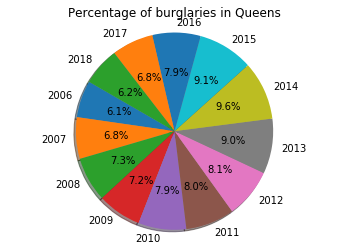

In [42]:
offense_type='BURGLARY'

qns_type=arrest_counts.loc[offense_type]

labels=['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']

plt.pie(qns_type,labels=labels,autopct="%1.1f%%",shadow=True,startangle=150)
plt.title('Percentage of burglaries in Queens')
plt.axis("equal")
plt.savefig('data/qnsburglaries.png')
plt.show

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


<function matplotlib.pyplot.show(*args, **kw)>

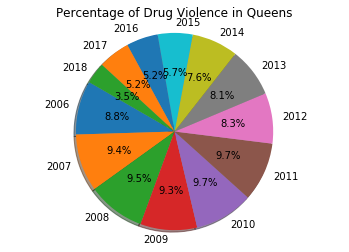

In [10]:
offense_type='DANGEROUS DRUGS'

qns_type=arrest_counts.loc[offense_type]



labels=['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']

plt.pie(qns_type,labels=labels,autopct="%1.1f%%",shadow=True,startangle=150)
plt.title('Percentage of Drug Violence in Queens')
plt.axis("equal")
plt.savefig('data/qnsdrugs.png')
plt.show

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


<function matplotlib.pyplot.show(*args, **kw)>

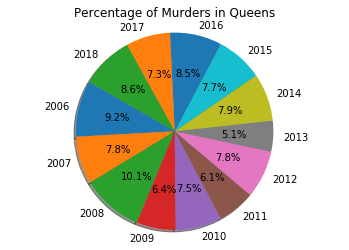

In [11]:
offense_type='MURDER & NON-NEGL. MANSLAUGHTER'

qns_type=arrest_counts.loc[offense_type]



labels=['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']

plt.pie(qns_type,labels=labels,autopct="%1.1f%%",shadow=True,startangle=150)
plt.title('Percentage of Murders in Queens')
plt.axis("equal")
plt.savefig('data/qnsmurder.png')
plt.show

In [44]:
qns_burglaries=queens_data[queens_data['Type of Offense']=='BURGLARY'].groupby([queens_data['Year']])

burglary_total=qns_burglaries['Arrest Key'].count()
burglary_total

Year
2006     7748
2007     8715
2008     9380
2009     9211
2010    10064
2011    10218
2012    10374
2013    11544
2014    12313
2015    11611
2016    10093
2017     8744
2018     7940
Name: Arrest Key, dtype: int64

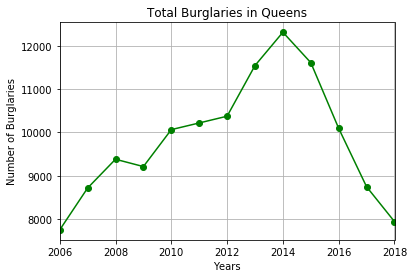

<Figure size 432x288 with 0 Axes>

In [45]:
qns_chart = burglary_total.plot(kind="line", title="Total Burglaries in Queens",marker='o',c='g')
plt.xlabel("Years")
plt.ylabel("Number of Burglaries")
plt.grid()
plt.savefig('data/burglariesgrid')
plt.show()

plt.tight_layout()

In [16]:
qns_drugs=queens_data[queens_data['Type of Offense']=='DANGEROUS DRUGS'].groupby([queens_data['Year']])

drugs_total=qns_drugs['Arrest Key'].count()
drugs_total

Year
2006    12477
2007    13360
2008    13394
2009    13143
2010    13654
2011    13707
2012    11748
2013    11462
2014    10760
2015     8095
2016     7341
2017     7401
2018     4931
Name: Arrest Key, dtype: int64

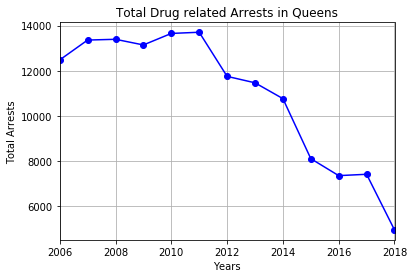

<Figure size 432x288 with 0 Axes>

In [34]:
qns_chart = drugs_total.plot(kind="line", title="Total Drug related Arrests in Queens",marker='o',c='b')
plt.xlabel("Years")
plt.ylabel("Total Arrests")
plt.grid()
plt.savefig('data/drugsgrid')
plt.show()

plt.tight_layout()

In [18]:
queens_murd=queens_data[queens_data['Type of Offense']=='MURDER & NON-NEGL. MANSLAUGHTER'].groupby([queens_data['Year']])
murd_total=queens_murd['Arrest Key'].count()
murd_total

Year
2006    238
2007    202
2008    260
2009    166
2010    195
2011    158
2012    202
2013    131
2014    203
2015    199
2016    219
2017    188
2018    223
Name: Arrest Key, dtype: int64

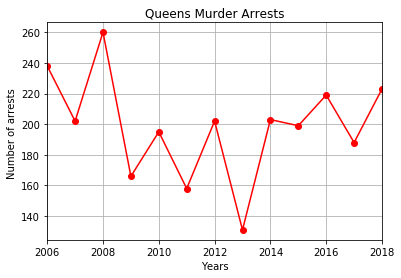

<Figure size 432x288 with 0 Axes>

In [59]:
qns_chart = murd_total.plot(kind="line", title="Queens Murder Arrests",marker='o',c='r')
plt.xlabel("Years")
plt.ylabel("Number of arrests ")
plt.grid()
plt.savefig('data/murdergrid')
plt.show()

plt.tight_layout()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


<function matplotlib.pyplot.show(*args, **kw)>

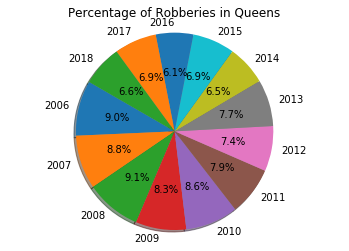

In [50]:
offense_type='ROBBERY'

qns_type=arrest_counts.loc[offense_type]



labels=['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']

plt.pie(qns_type,labels=labels,autopct="%1.1f%%",shadow=True,startangle=150)
plt.title('Percentage of Robberies in Queens')
plt.axis("equal")
plt.savefig('data/qnsrob.png')
plt.show

In [51]:
queens_rob=queens_data[queens_data['Type of Offense']=='ROBBERY'].groupby([queens_data['Year']])
rob_total=queens_rob['Arrest Key'].count()
rob_total

Year
2006    2612
2007    2547
2008    2628
2009    2393
2010    2490
2011    2295
2012    2139
2013    2212
2014    1888
2015    1993
2016    1771
2017    2006
2018    1920
Name: Arrest Key, dtype: int64

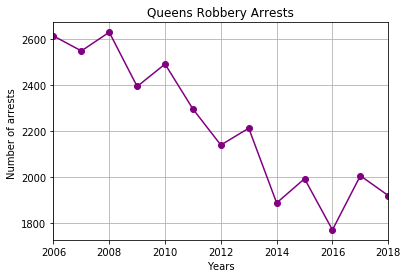

<Figure size 432x288 with 0 Axes>

In [58]:
qns_chart = rob_total.plot(kind="line", title="Queens Robbery Arrests",marker='o',c='purple')
plt.xlabel("Years")
plt.ylabel("Number of arrests ")
plt.grid()
plt.savefig('data/robgrid')
plt.show()

plt.tight_layout()